# Libraries

In [2]:
import pandas as pd
import pickle
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import re
import warnings
import operator
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy import stats
from itertools import cycle, islice

# Data Loading


In [2]:
# загружаем данные из ga_hits, приводим типы данных, проверяем что они загрузились
pd.options.mode.chained_assignment = None 
# df = pd.read_csv('data/df_out.csv'), dtype={'price':float, 'year':"Int64"}
df_hits = pd.read_csv('data/ga_hits.csv', parse_dates=["hit_date"])
pd.to_datetime(df_hits['hit_date'], utc=False)
df_hits.tail()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN
15726469,1569014437485249865.1640269129.1640269129,2021-12-23,742820.0,46,event,NaN,sberauto.com/cars/all/bmw/7-serii/399ac530?utm...,quiz,quiz_show,NaN,NaN


In [3]:
# загружаем данные из ga_sessions, приводим типы данных, проверяем что они загрузились
pd.options.mode.chained_assignment = None 
df_sessions = pd.read_csv('data/ga_sessions.csv', parse_dates=["visit_date"])
pd.to_datetime(df_sessions['visit_date'], utc=False)
df_sessions.tail()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk
1860041,9055430416266113553.1640968742.1640968742,2108381692.164097,2021-12-31,19:39:02,1,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,desktop,Linux,NaN,NaN,1366x768,Chrome,Russia,Moscow


In [4]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   session_id      object        
 1   hit_date        datetime64[ns]
 2   hit_time        float64       
 3   hit_number      int64         
 4   hit_type        object        
 5   hit_referer     object        
 6   hit_page_path   object        
 7   event_category  object        
 8   event_action    object        
 9   event_label     object        
 10  event_value     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1.3+ GB


In [5]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                object        
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   utm_keyword               object        
 10  device_category           object        
 11  device_os                 object        
 12  device_brand              object        
 13  device_model              object        
 14  device_screen_resolution  object        
 15  device_browser            object        
 16  geo_country               object        
 17  geo_city

# Data Preparation

## Data Cleaning

In [6]:
df_hits.shape

(15726470, 11)

<AxesSubplot: >

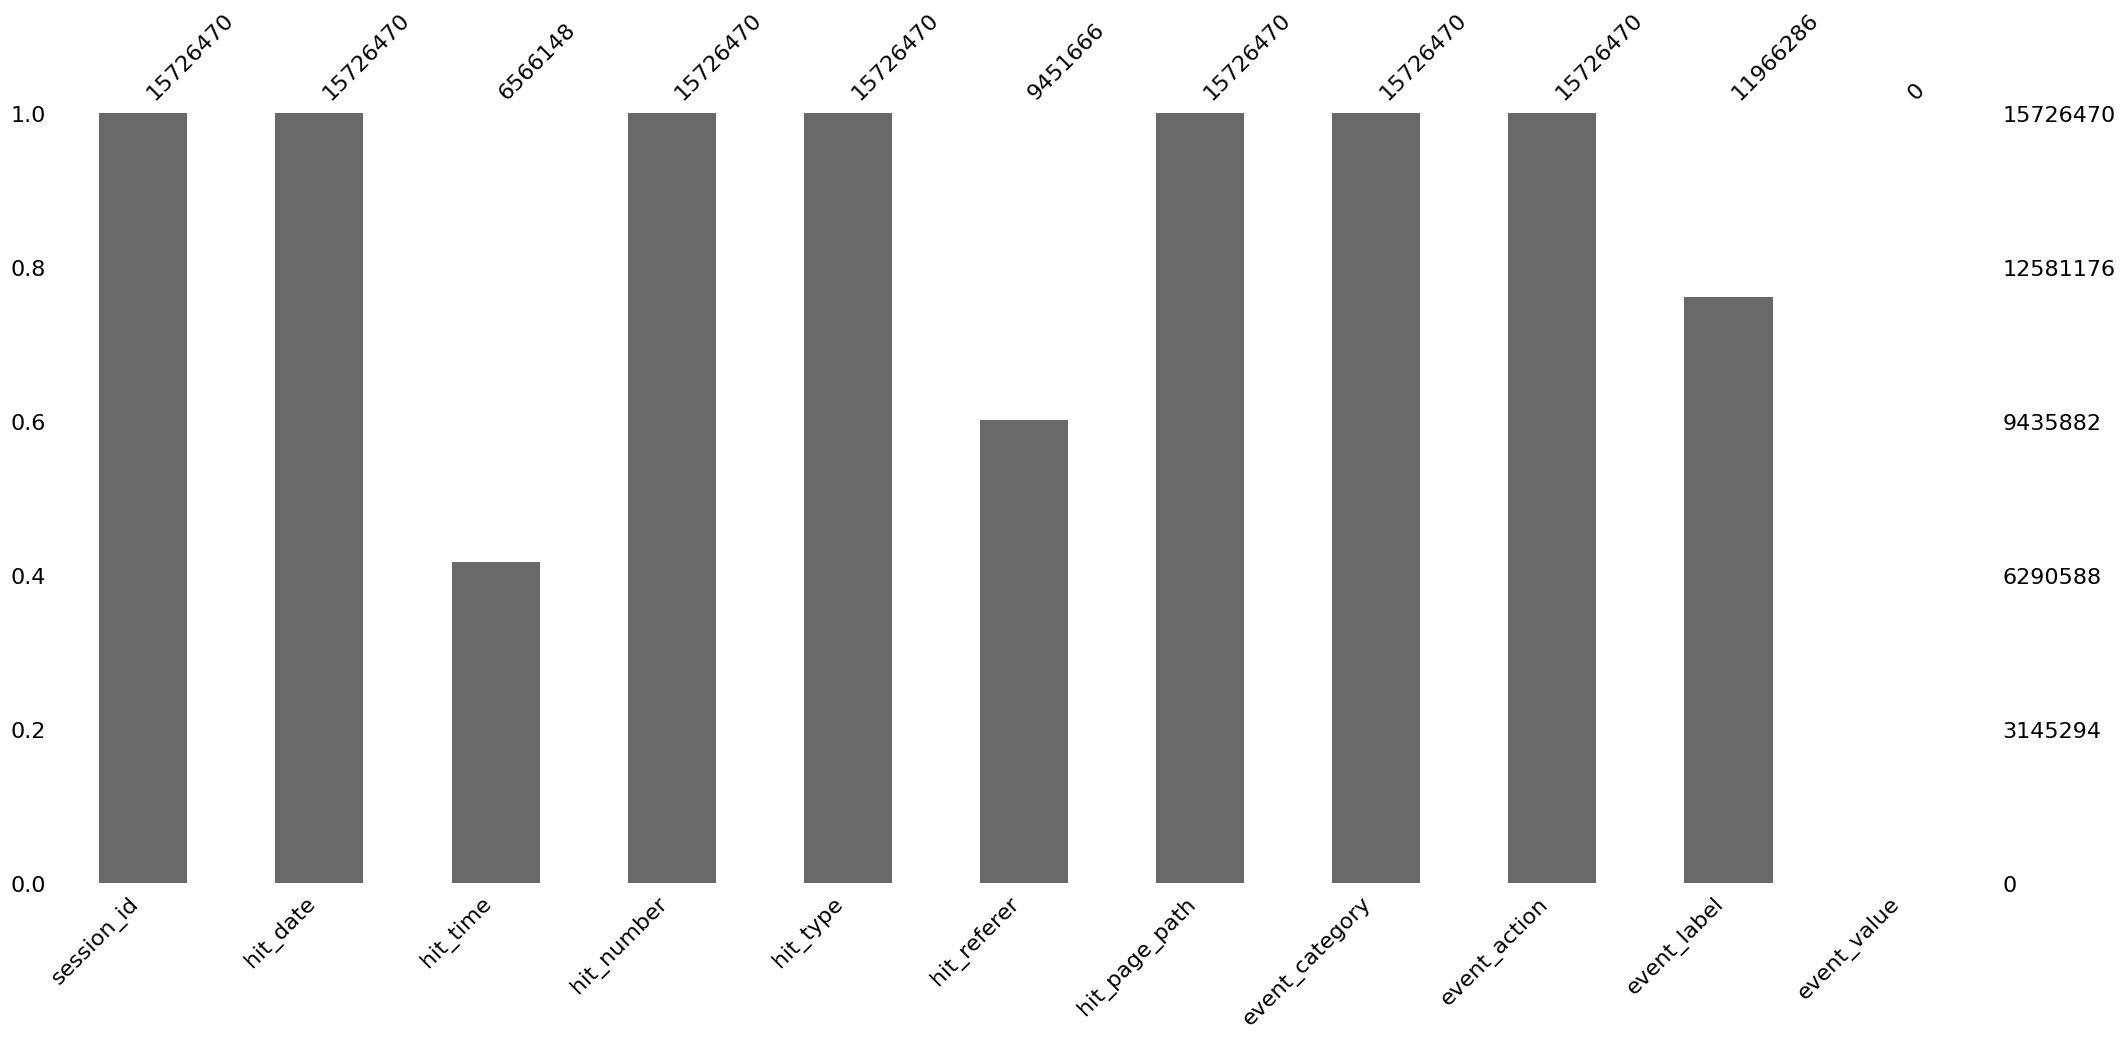

In [7]:
msno.bar(df_hits)

In [8]:
# так же выводим информацию о заполнении ga_hits
def print_useful_rows_info(df_hits):
    print('Количество полностью заполненных объектов из всей выборки:', len(df_hits.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df_hits.dropna()) / len(df_hits) * 100, 2))
print_useful_rows_info(df_hits)

Количество полностью заполненных объектов из всей выборки: 0
Процент полностью заполненных объектов из всей выборки: 0.0


In [9]:
# конкретезируем где именно и сколько процентов данных пропущено
missing_values = ((df_hits.isna().sum() / len(df_hits)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


event_value       100.000000
hit_time           58.247795
hit_referer        39.899634
event_label        23.909905
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
dtype: float64

In [10]:
#удаляем поля с пропущенными значениями, так как заполнить их нам не откуда да и смысла в нашей работе они не имеют
df_hits_clean = df_hits.drop([
    'event_value', 'hit_time', 'hit_referer', 'event_label', 'hit_number', 'hit_type', 'event_category', 'hit_date'
], axis = 1)

In [11]:
df_hits_clean.shape

(15726470, 3)

In [12]:
# конкретезируем где именно и сколько процентов данных пропущено
missing_values = ((df_hits_clean.isna().sum() / len(df_hits_clean)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id       0.0
hit_page_path    0.0
event_action     0.0
dtype: float64

##### Обработаем самое затратное для оперативной памяти поле hit_page_path достав из него марку и модель машины, само поле удалим как ненужное

In [13]:
df_hits_clean['brand'] = df_hits_clean.hit_page_path.apply(
    lambda x: x[x.find('/cars/all') + 10:].split('/')[0] if x.find('/cars/all') > -1 else 'nd')
df_hits_clean['model'] = df_hits_clean.hit_page_path.apply(
    lambda x: x[x.find('/cars/all') + 10:].split('/')[1] if x.find('/cars/all') > -1 else 'nd')

In [14]:
df_hits_clean = df_hits_clean.drop(['hit_page_path'], axis = 1)

In [15]:
df_sessions.shape

(1860042, 18)

#### Оценка таблицы ga_sessions

<AxesSubplot: >

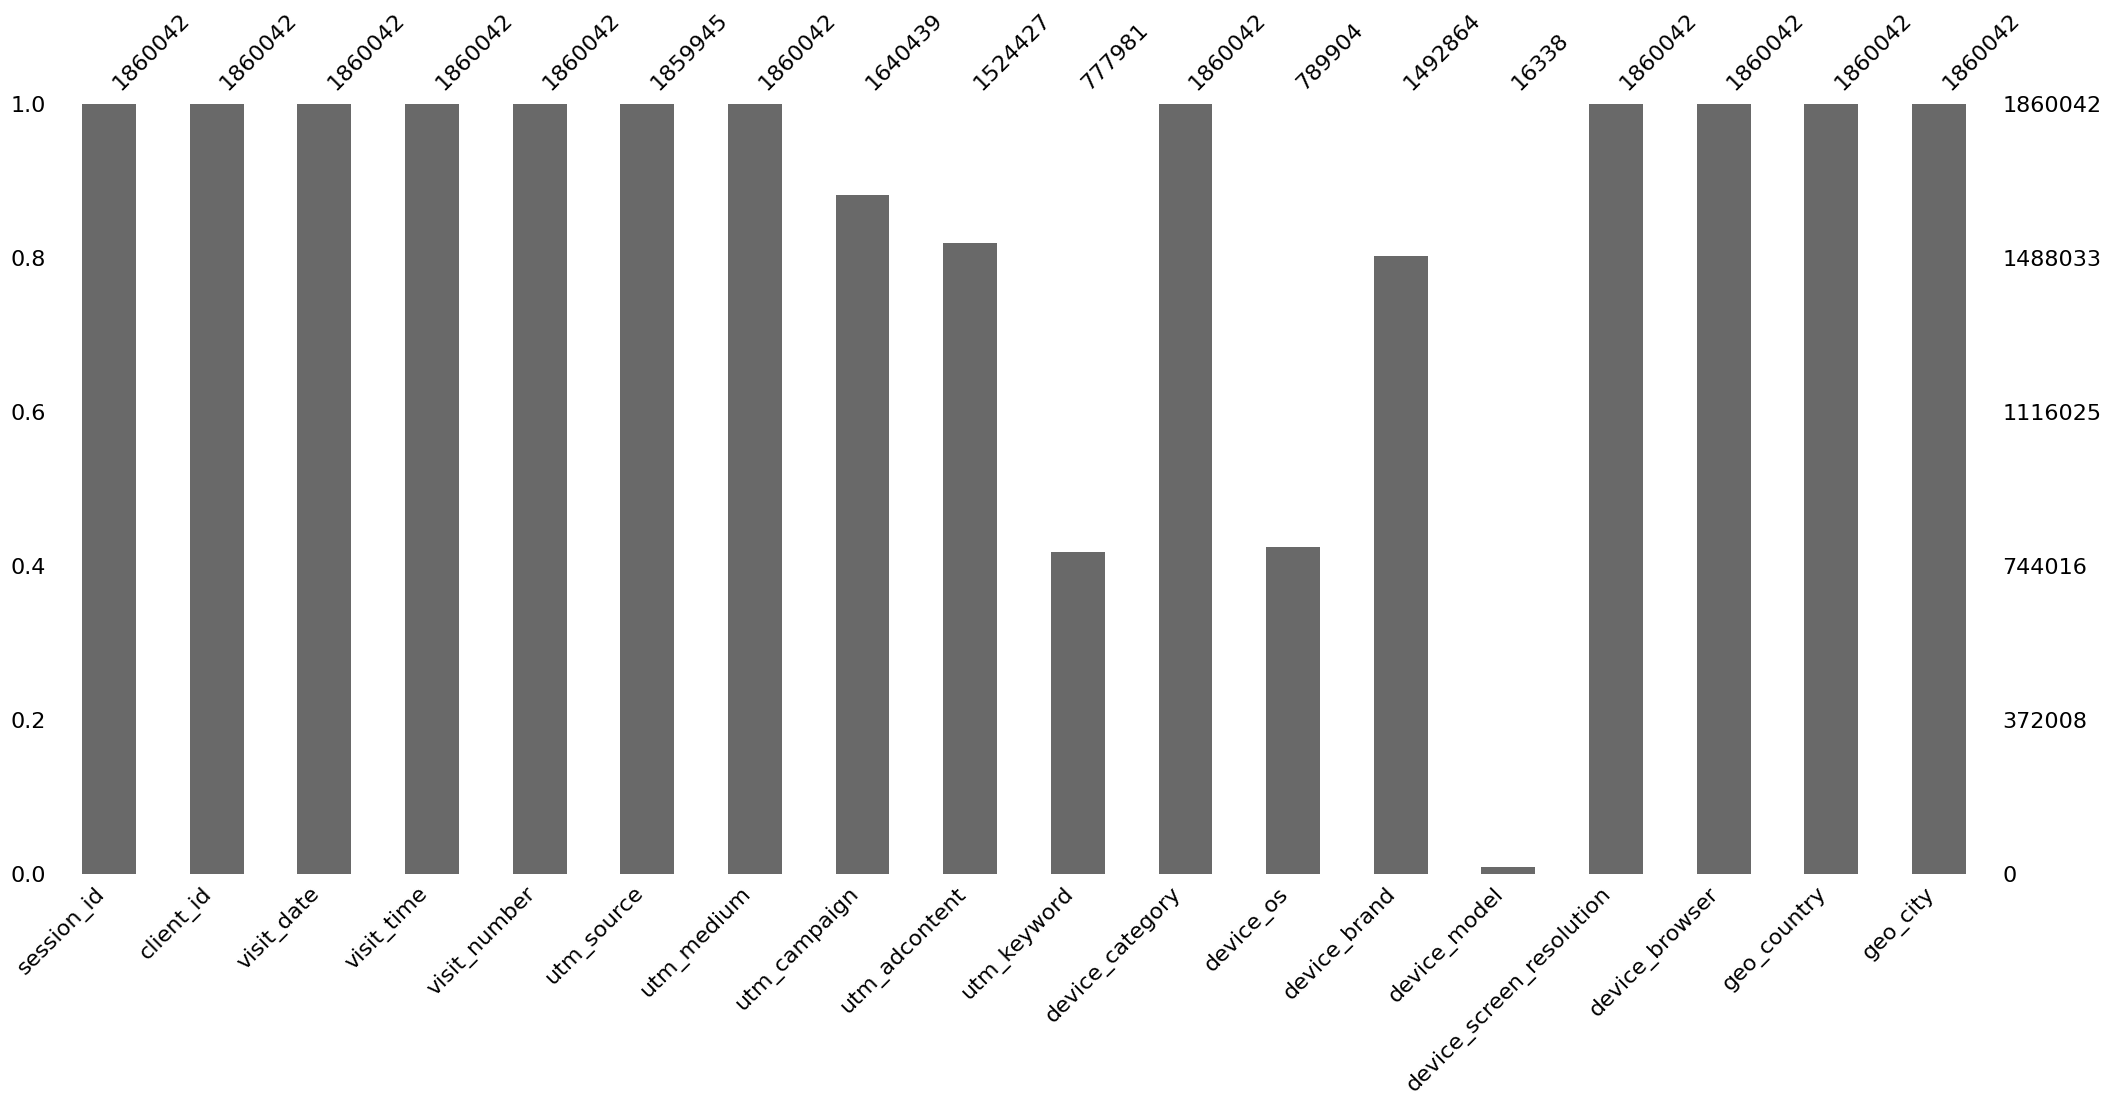

In [16]:
msno.bar(df_sessions)

In [17]:
def print_useful_rows_info(df_sessions):
    print('Количество полностью заполненных объектов из всей выборки:', len(df_sessions.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df_sessions.dropna()) / len(df_sessions) * 100, 2))
print_useful_rows_info(df_sessions)

Количество полностью заполненных объектов из всей выборки: 14940
Процент полностью заполненных объектов из всей выборки: 0.8


In [18]:
# конкретезируем где именно и сколько процентов данных пропущено
missing_values_in_sessions = ((df_sessions.isna().sum() / len(df_sessions)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values_in_sessions

Процент пропущенных значений:


device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
device_brand                19.740307
utm_adcontent               18.043410
utm_campaign                11.806346
utm_source                   0.005215
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
geo_city                     0.000000
dtype: float64

##### Удалим ненужные в работе атрибуты

In [19]:
df_session_clean = df_sessions.drop([
    'visit_time', 'utm_keyword', 'device_os', 'device_brand', 'device_model', 'device_screen_resolution', 
    'utm_adcontent', 'device_browser'
], axis = 1)

In [20]:
df_session_clean.shape

(1860042, 10)

In [21]:
missing_values_in_session_clean = ((df_session_clean.isna().sum() / len(df_session_clean)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values_in_session_clean

Процент пропущенных значений:


utm_campaign       11.806346
utm_source          0.005215
session_id          0.000000
client_id           0.000000
visit_date          0.000000
visit_number        0.000000
utm_medium          0.000000
device_category     0.000000
geo_country         0.000000
geo_city            0.000000
dtype: float64

In [22]:
# посмотрим количество пропусков в поле utm_campaign
df_session_clean.utm_campaign.isna().sum()

219603

In [23]:
# посмотрим количество пропусков в поле utm_source
df_session_clean.utm_source.isna().sum()

97

In [126]:
# Заполняем NaN поля utm_source
utm_src = df_session_clean['utm_source'].mode()
df_session_clean['utm_source'] = df_session_clean['utm_source'].fillna(utm_src)
missing_values_in_session_clean = ((df_session_clean.isna().sum() / len(df_session_clean)) * 100).sort_values(ascending=False)
print('Процент пропущенных значений:')
missing_values_in_session_clean

Процент пропущенных значений:


session_id         0.0
client_id          0.0
visit_date         0.0
visit_number       0.0
utm_source         0.0
utm_medium         0.0
utm_campaign       0.0
device_category    0.0
geo_country        0.0
geo_city           0.0
dtype: float64

In [25]:
# заполним пропущенные значения в поле utm_campaign как "not set"
df_session_clean.utm_campaign = df_session_clean.utm_campaign.fillna('not set')
df_session_clean.utm_campaign.isna().sum()

0

In [26]:
# заполним пропущенные значения в поле utm_source как "not set"
df_session_clean.utm_source = df_session_clean.utm_source.fillna('not set')
df_session_clean.utm_source.isna().sum()

0

### Для экономии памяти сохраним очищенные датасеты в csv файлы

In [27]:
df_session_clean.to_csv('data/session_clean.csv', index=False)
df_hits_clean.to_csv('data/hits_clean.csv', index=False)

#### загружаем сохраненные таблицы

In [28]:
pd.options.mode.chained_assignment = None 
df_session_clean = pd.read_csv('data/session_clean.csv', parse_dates=["visit_date"])
pd.to_datetime(df_sessions['visit_date'], utc=False)
df_session_clean.head(1)



,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust


In [29]:
df_hits_clean = pd.read_csv('data/hits_clean.csv')
df_hits_clean.head(1)

,session_id,event_action,brand,model
0,5639623078712724064.1640254056.1640254056,quiz_show,nd,nd


In [30]:
df_session_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       object        
 1   client_id        object        
 2   visit_date       datetime64[ns]
 3   visit_number     int64         
 4   utm_source       object        
 5   utm_medium       object        
 6   utm_campaign     object        
 7   device_category  object        
 8   geo_country      object        
 9   geo_city         object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 141.9+ MB


In [31]:
df_hits_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   session_id    object
 1   event_action  object
 2   brand         object
 3   model         object
dtypes: object(4)
memory usage: 479.9+ MB


### Объединяем две таблицы


In [32]:
# группируем по session_id
df_merged = pd.merge(left=df_hits_clean, right=df_session_clean, on='session_id', how='outer')
df_merged.head(1)

,session_id,event_action,brand,model,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,quiz_show,nd,nd,1313077071.164025,2021-12-23,2.0,kjsLglQLzykiRbcDiGcD,cpc,not set,mobile,Russia,Saint Petersburg


### Выносим целевые действие в отдельный атрибут

In [33]:
df_merged['target']=np.where(df_merged['event_action'].isin(['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']), 1, 0)
# проверяем правильность действий - делаем выборку по критерию из target = 1
df_merged[df_merged['event_action']=='sub_submit_success'].head(2)

,session_id,event_action,brand,model,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,target
261,6466333295973247896.1640246168.1640246168,sub_submit_success,skoda,octavia,1505560543.164025,2021-12-23,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,desktop,Russia,Moscow,1
1664,5464132007783287924.1640221812.1640221812,sub_submit_success,skoda,rapid,1272217372.164022,2021-12-23,1.0,QxAxdyPLuQMEcrdZWdWb,cpa,mSVMBvlHFgftJaQAZEdp,mobile,Russia,Kazan,1


### Разделяем рекламу на соц сети и остальное, выносим в отдельный атрибут

In [34]:
df_merged['social']=np.where(df_merged['utm_source'].isin(['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']), 1, 0)
# проверяем правильность действий - делаем выборку по критерию из social = 1
df_merged[df_merged['utm_source']=='gVRrcxiDQubJiljoTbGm'].head(2)

,session_id,event_action,brand,model,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,target,social
6560,569012340054529412.1640207749.1640207749,view_card,volkswagen,touareg,132483509.164021,2021-12-23,1.0,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,0,1
6561,569012340054529412.1640207749.1640207749,view_new_card,volkswagen,touareg,132483509.164021,2021-12-23,1.0,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,0,1


### Выносим признак органического и платного трафика в отдельный атрибут


In [35]:
df_merged['organ']=np.where(df_merged['utm_medium'].isin(['organic', 'referral', '(none)']), 1, 0)
# проверяем правильность действий - делаем выборку по критерию из organ = 1
df_merged[df_merged['utm_medium']=='organic'].head(2)

,session_id,event_action,brand,model,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,target,social,organ
451,555009234841130092.1640256620.1640256620,quiz_show,kia,sorento,129223157.164026,2021-12-23,1.0,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,desktop,Russia,Saint Petersburg,0,0,1
452,555009234841130092.1640256620.1640256620,view_card,haval,jolion,129223157.164026,2021-12-23,1.0,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,desktop,Russia,Saint Petersburg,0,0,1


### Разделяем локации на города присутствия и остальные

In [36]:
df_merged['pres_cities']=np.where(df_merged['geo_city'].isin(['Saint Petersburg', 'Moscow']), 1, 0)
# проверяем правильность действий - делаем выборку по критерию из pres_cities = 1
df_merged[df_merged['geo_city']=='Saint Petersburg'].head(2)

,session_id,event_action,brand,model,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,target,social,organ,pres_cities
0,5639623078712724064.1640254056.1640254056,quiz_show,nd,nd,1313077071.164025,2021-12-23,2.0,kjsLglQLzykiRbcDiGcD,cpc,not set,mobile,Russia,Saint Petersburg,0,0,0,1
1,5639623078712724064.1640254056.1640254056,view_new_card,kia,seltos,1313077071.164025,2021-12-23,2.0,kjsLglQLzykiRbcDiGcD,cpc,not set,mobile,Russia,Saint Petersburg,0,0,0,1


#### выводим список столбцов ищем те которые из поставленной задачи нам больше не нужны

In [37]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15854246 entries, 0 to 15854245
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       object        
 1   event_action     object        
 2   brand            object        
 3   model            object        
 4   client_id        object        
 5   visit_date       datetime64[ns]
 6   visit_number     float64       
 7   utm_source       object        
 8   utm_medium       object        
 9   utm_campaign     object        
 10  device_category  object        
 11  geo_country      object        
 12  geo_city         object        
 13  target           int32         
 14  social           int32         
 15  organ            int32         
 16  pres_cities      int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(11)
memory usage: 1.9+ GB


In [38]:
# удаляем ненужные столбцы
df_merged = df_merged.drop(['utm_source', 'utm_medium', 'event_action'], axis=1)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15854246 entries, 0 to 15854245
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       object        
 1   brand            object        
 2   model            object        
 3   client_id        object        
 4   visit_date       datetime64[ns]
 5   visit_number     float64       
 6   utm_campaign     object        
 7   device_category  object        
 8   geo_country      object        
 9   geo_city         object        
 10  target           int32         
 11  social           int32         
 12  organ            int32         
 13  pres_cities      int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(8)
memory usage: 1.5+ GB


##### Проверяем на наличие дублей и в случае если они есть удаляем их

In [39]:
df_merged.shape

(15854246, 14)

In [40]:
df_merged = df_merged.drop_duplicates()

In [41]:
df_merged.shape

(2292309, 14)

##### сохраняем подготовленные таблицы в csv 

In [42]:
df_merged.to_csv('data/merged.csv', index=False)

In [3]:
pd.options.mode.chained_assignment = None 
df_merged = pd.read_csv('data/merged.csv', parse_dates=["visit_date"], compression='zip')
pd.to_datetime(df_merged['visit_date'], utc=False)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292309 entries, 0 to 2292308
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       object        
 1   brand            object        
 2   model            object        
 3   client_id        object        
 4   visit_date       datetime64[ns]
 5   visit_number     float64       
 6   utm_campaign     object        
 7   device_category  object        
 8   geo_country      object        
 9   geo_city         object        
 10  target           int64         
 11  social           int64         
 12  organ            int64         
 13  pres_cities      int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 244.8+ MB


In [44]:
# выведем количество уникальных значений
df_merged.nunique()

session_id         1862386
brand                   21
model                   75
client_id          1431283
visit_date             226
visit_number           537
utm_campaign           413
device_category          3
geo_country            166
geo_city              2548
target                   2
social                   2
organ                    2
pres_cities              2
dtype: int64

In [45]:
# приведем колонки в которых количество уникальных значений менее 300 к категориальному типу
none_cat_cols = ['session_id', 'geo_city', 'model', 'brand', 'visit_date', 'organ', 'target', 'social', 'pres_cities']
for col in df_merged.columns:
    if df_merged[col].nunique() < 500 and col not in none_cat_cols: 
        df_merged[col] = df_merged[col].astype('category')

In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292309 entries, 0 to 2292308
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       object        
 1   brand            object        
 2   model            object        
 3   client_id        object        
 4   visit_date       datetime64[ns]
 5   visit_number     float64       
 6   utm_campaign     category      
 7   device_category  category      
 8   geo_country      category      
 9   geo_city         object        
 10  target           int64         
 11  social           int64         
 12  organ            int64         
 13  pres_cities      int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 203.3+ MB


##### на основе подготовленной таблицы создадим 2 таблицы выбрав в одной все данные относящиеся к органическому поиску и во второй к платному поиску, на основании данных из этих таблиц создадим третью включающую в себя поле Conversion Rate 

In [4]:

df_copy = df_merged.copy()
df_organ = df_copy[df_copy["organ"]==1]
organic = df_organ.groupby(['visit_date', 'session_id'], as_index=False).agg({"target":"max"})
organic = organic.groupby(['visit_date'], as_index=False).agg({'session_id': 'count', 'target': 'sum'})
organic = organic.rename(columns={'session_id': 'visit_count', 'target': 'organic_target'})
organic ['organic_CR'] = round((organic.organic_target/organic.visit_count)*100, 2)
organic.head()

,visit_date,visit_count,organic_target,organic_CR
0,2021-05-19,870,50,5.75
1,2021-05-21,1043,0,0.00
2,2021-05-22,861,10,1.16
3,2021-05-23,964,40,4.15
4,2021-05-24,39056,2524,6.46


In [48]:
df_non_organ = df_copy[df_copy["organ"]==0]
paid = df_non_organ.groupby(['visit_date', 'session_id', "organ"], as_index=False).agg({"target":"max"})
paid = paid.groupby(['visit_date'], as_index=False).agg({'session_id': 'count', 'target': 'sum', "organ": "min"})
paid = paid.rename(columns={'session_id': 'visit_count2', 'target': 'paid_target'})
paid ['paid_CR'] = round((paid.paid_target/paid.visit_count2)*100, 2)
paid


,visit_date,visit_count2,paid_target,organ,paid_CR
0,2021-05-19,7,0,0,0.00
1,2021-05-21,67,0,0,0.00
2,2021-05-22,125,1,0,0.80
3,2021-05-23,282,6,0,2.13
4,2021-05-24,397,12,0,3.02
...,...,...,...,...,...
221,2021-12-27,9246,195,0,2.11
222,2021-12-28,10288,215,0,2.09
223,2021-12-29,11344,192,0,1.69
224,2021-12-30,11838,152,0,1.28


In [49]:
organic_or_not_CR = pd.merge(left=organic, right=paid, on='visit_date', how='outer')
organic_or_not_CR = organic_or_not_CR.rename(columns={"visit_count": "organic_visit", "visit_count2": "paid_visit"})
organic_or_not_CR.head()

,visit_date,organic_visit,organic_target,organic_CR,paid_visit,paid_target,organ,paid_CR
0,2021-05-19,870,50,5.75,7,0,0,0.00
1,2021-05-21,1043,0,0.00,67,0,0,0.00
2,2021-05-22,861,10,1.16,125,1,0,0.80
3,2021-05-23,964,40,4.15,282,6,0,2.13
4,2021-05-24,39056,2524,6.46,397,12,0,3.02


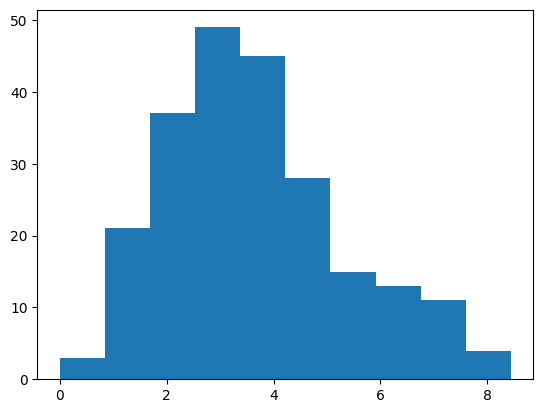

In [50]:
# проверим равномерность распределений выборки
plt.hist(organic_or_not_CR.organic_CR);

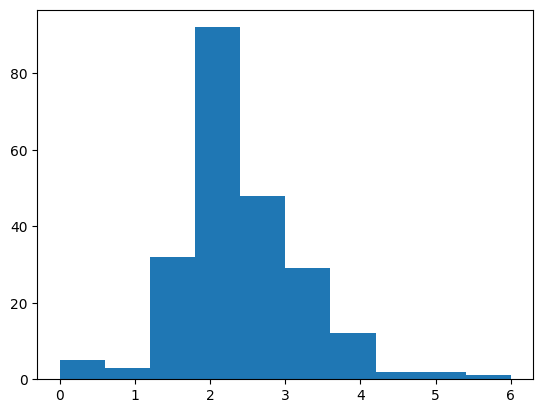

In [51]:
# проверим равномерность распределений выборки
plt.hist(organic_or_not_CR.paid_CR);

In [52]:
#проверим гипотезу равенства дисперсий
l_r = stats.levene(organic_or_not_CR.organic_CR, organic_or_not_CR.paid_CR)
l_r

LeveneResult(statistic=87.86870347831825, pvalue=3.4227731936078526e-19)

In [53]:
print(f'учитывая значение pvalue = {l_r[1]: .60f} можно утверждать что дисперсии не равны')

учитывая значение pvalue =  0.000000000000000000342277319360785261747932186651143746664398 можно утверждать что дисперсии не равны


#### разделим основную таблицу на две по типу устройств (мобильные либо десктоп) на основании данных этих таблиц посчитаем Conversion Rate для каждого типа устройств

In [54]:
df_mobile = df_copy[df_copy["device_category"] != 'desktop']
mobile = df_mobile.groupby(['visit_date', 'session_id'], as_index=False).agg({"target":"max"})
mobile = mobile.groupby(['visit_date'], as_index=False).agg({'session_id': 'count', 'target': 'sum'})
mobile = mobile.rename(columns={'session_id': 'mobile_visit_count', 'target': 'mobile_target'})
mobile ['mobile_CR'] = round((mobile.mobile_target/mobile.mobile_visit_count)*100, 2)
mobile.head()

,visit_date,mobile_visit_count,mobile_target,mobile_CR
0,2021-05-19,369,22,5.96
1,2021-05-21,522,0,0.00
2,2021-05-22,682,7,1.03
3,2021-05-23,877,32,3.65
4,2021-05-24,24020,1535,6.39


In [55]:
df_desktop = df_copy[df_copy["device_category"] == 'desktop']
desktop = df_desktop.groupby(['visit_date', 'session_id'], as_index=False).agg({"target":"max"})
desktop = desktop.groupby(['visit_date'], as_index=False).agg({'session_id': 'count', 'target': 'sum'})
desktop = desktop.rename(columns={'session_id': 'desktop_visit_count', 'target': 'desktop_target'})
desktop ['desktop_CR'] = round((desktop.desktop_target/desktop.desktop_visit_count)*100, 2)
desktop.head()

,visit_date,desktop_visit_count,desktop_target,desktop_CR
0,2021-05-19,508,28,5.51
1,2021-05-21,588,0,0.00
2,2021-05-22,304,4,1.32
3,2021-05-23,369,14,3.79
4,2021-05-24,15433,1001,6.49


In [56]:
mobile_or_not_CR = pd.merge(left=mobile, right=desktop, on='visit_date', how='outer')
mobile_or_not_CR = mobile_or_not_CR.rename(columns={"visit_count": "mobile_visit", "visit_count2": "desktop_visit"})
mobile_or_not_CR.head()

,visit_date,mobile_visit_count,mobile_target,mobile_CR,desktop_visit_count,desktop_target,desktop_CR
0,2021-05-19,369,22,5.96,508,28,5.51
1,2021-05-21,522,0,0.00,588,0,0.00
2,2021-05-22,682,7,1.03,304,4,1.32
3,2021-05-23,877,32,3.65,369,14,3.79
4,2021-05-24,24020,1535,6.39,15433,1001,6.49


In [57]:
df_home_cities = df_copy[df_copy["pres_cities"] == 1]
df_home_city = df_home_cities.groupby(['visit_date', 'session_id'], as_index=False).agg({"target":"max"})
df_home_city = df_home_city.groupby(['visit_date'], as_index=False).agg({'session_id': 'count', 'target': 'sum'})
df_home_city = df_home_city.rename(columns={'session_id': 'pres_cities_count', 'target': 'pres_cities_target'})
df_home_city['pres_cities_CR'] = round((df_home_city.pres_cities_target/df_home_city.pres_cities_count)*100, 2)
df_home_city.head()

,visit_date,pres_cities_count,pres_cities_target,pres_cities_CR
0,2021-05-19,463,50,10.80
1,2021-05-21,672,0,0.00
2,2021-05-22,591,9,1.52
3,2021-05-23,718,33,4.60
4,2021-05-24,24799,1579,6.37


In [58]:
df_other_cities = df_copy[df_copy["pres_cities"] == 0]
df_other_city = df_other_cities.groupby(['visit_date', 'session_id'], as_index=False).agg({"target":"max"})
df_other_city = df_other_city.groupby(['visit_date'], as_index=False).agg({'session_id': 'count', 'target': 'sum'})
df_other_city = df_other_city.rename(columns={'session_id': 'other_cities_count', 'target': 'other_cities_target'})
df_other_city['other_cities_CR'] = round((df_other_city.other_cities_target/df_other_city.other_cities_count)*100, 2)
df_other_city.head()

,visit_date,other_cities_count,other_cities_target,other_cities_CR
0,2021-05-19,414,0,0.00
1,2021-05-21,438,0,0.00
2,2021-05-22,395,2,0.51
3,2021-05-23,528,13,2.46
4,2021-05-24,14654,957,6.53


In [59]:
all_cities_CR = pd.merge(left=df_home_city, right=df_other_city, on='visit_date', how='outer')
all_cities_CR = all_cities_CR.rename(columns={"visit_count": "home_city_visit", "visit_count2": "other_city_visit"})
all_cities_CR.head()

,visit_date,pres_cities_count,pres_cities_target,pres_cities_CR,other_cities_count,other_cities_target,other_cities_CR
0,2021-05-19,463,50,10.80,414,0,0.00
1,2021-05-21,672,0,0.00,438,0,0.00
2,2021-05-22,591,9,1.52,395,2,0.51
3,2021-05-23,718,33,4.60,528,13,2.46
4,2021-05-24,24799,1579,6.37,14654,957,6.53


##### Проверим распределение данных в выборках используя тест Шапиро-Уилка

In [60]:
stats.shapiro(organic_or_not_CR.paid_CR)

ShapiroResult(statistic=0.949252724647522, pvalue=4.0422060010314453e-07)

In [61]:
stats.shapiro(organic_or_not_CR.organic_CR)

ShapiroResult(statistic=0.9689028859138489, pvalue=7.247728353831917e-05)

In [62]:
stats.shapiro(mobile_or_not_CR.mobile_CR)

ShapiroResult(statistic=0.9118070006370544, pvalue=2.6031843347595895e-10)

In [63]:
stats.shapiro(mobile_or_not_CR.desktop_CR)

ShapiroResult(statistic=0.8708339333534241, pvalue=6.41649385534071e-13)

In [64]:
stats.shapiro(all_cities_CR.pres_cities_CR)

ShapiroResult(statistic=0.844833493232727, pvalue=2.7248333323297465e-14)

In [65]:
stats.shapiro(all_cities_CR.other_cities_CR)

ShapiroResult(statistic=0.9062870740890503, pvalue=1.0537494488094268e-10)

##### получив pvalue во всех испытания значительно меньше 5% - можем утверждать что выборки не из нормального распределения

##### Подготовка данных к ответу на вопрос -
##### из каких локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)

In [66]:
df_other_cities = df_copy[df_copy["pres_cities"] == 0]
df_other_city = df_other_cities.groupby(['visit_date', 'session_id'], as_index=False).agg({"target":"max"})
df_other_city = df_other_city.groupby(['visit_date'], as_index=False).agg({'session_id': 'count', 'target': 'sum'})
df_other_city = df_other_city.rename(columns={'session_id': 'other_cities_count', 'target': 'other_cities_target'})
df_other_city['other_cities_CR'] = round((df_other_city.other_cities_target/df_other_city.other_cities_count)*100, 2)
df_other_city.head()

,visit_date,other_cities_count,other_cities_target,other_cities_CR
0,2021-05-19,414,0,0.00
1,2021-05-21,438,0,0.00
2,2021-05-22,395,2,0.51
3,2021-05-23,528,13,2.46
4,2021-05-24,14654,957,6.53


In [67]:
# выбираем top 10 городов по общему трафику 
top_total_city = df_copy.copy()
# geo_CR['month'] = geo_CR.visit_date.dt.month
top_total_city = top_total_city.groupby(['geo_city'], as_index=False).agg({'target': 'count'})
top_total_city.head(10)

,geo_city,target
0,'s-Hertogenbosch,3
1,(not set),92825
2,10th of Ramadan City,13
3,12214,2
4,13403,20
5,14076,2
6,2233,2
7,24130,53
8,38402,2
9,39404,4


In [68]:
# выбираем top 10 городов по целевым событиям
top_target_city = df_copy[df_copy["target"] == 1]
top_target_city = top_target_city.groupby(['geo_city'], as_index=False).agg({'target': 'sum'})
top_target_city.head(10)

,geo_city,target
0,(not set),1612
1,53425,5
2,7668,3
3,8756,1
4,Abakan,13
5,Abuja,1
6,Achinsk,2
7,Adana,1
8,Agadir,1
9,Aktobe,2


In [69]:
# сводная таблица по трафику в разрезе городов с расчетом CR (без доп условий отбора)
top_CR_city = pd.merge(left=top_total_city, right=top_target_city, on='geo_city', how='outer')
top_CR_city['CR'] = round((top_CR_city.target_y / top_CR_city.target_x) *100, 2)
top_CR_city.head(10)

,geo_city,target_x,target_y,CR
0,'s-Hertogenbosch,3,NaN,NaN
1,(not set),92825,1612.0,1.74
2,10th of Ramadan City,13,NaN,NaN
3,12214,2,NaN,NaN
4,13403,20,NaN,NaN
5,14076,2,NaN,NaN
6,2233,2,NaN,NaN
7,24130,53,NaN,NaN
8,38402,2,NaN,NaN
9,39404,4,NaN,NaN


In [5]:
# выбираем top городов по общему трафику где количество визитов не превышает 90 000 (без городов присутствия и неопределенной локации)
top_total_city_wo_top3 = df_copy.copy()
top_total_city_wo_top3 = top_total_city_wo_top3.groupby(['geo_city'], as_index=False).agg({'target': 'count'})
top_total_city_wo_top3 = top_total_city_wo_top3.query('target < 90000')
top_total_city_wo_top3.sort_values('target', inplace=True, ascending=False)
top_total_city_wo_top3.head(10)

,geo_city,target
2483,Yekaterinburg,44605
1110,Krasnodar,40486
1003,Kazan,37653
1949,Samara,31820
1546,Nizhny Novgorod,28301
2299,Ufa,27354
1585,Novosibirsk,26607
1117,Krasnoyarsk,19851
455,Chelyabinsk,19646
2280,Tula,19336


In [6]:
# выбираем top городов по целевому трафику где количество визитов не превышает 90 000 (без городов присутствия и неопределенной локации)
top_target_city_wo_top3 = df_copy.copy()
top_target_city_wo_top3 = top_target_city_wo_top3.groupby(['geo_city'], as_index=False).agg({'target': 'sum'})
top_target_city_wo_top3 = top_target_city_wo_top3.query('target < 1200')
top_target_city_wo_top3 = top_target_city_wo_top3.nlargest(n=10, columns=['target'])
top_target_city_wo_top3.head(10)

,geo_city,target
1003,Kazan,1186
1110,Krasnodar,1101
2483,Yekaterinburg,902
1949,Samara,745
2299,Ufa,650
1546,Nizhny Novgorod,579
1585,Novosibirsk,517
2280,Tula,457
788,Grozny,415
1901,Rostov-on-Don,408


In [72]:
# сводная таблица по трафику в разрезе городов с расчетом CR (без городов присутствия и неопределенной локации)
top_CR_city_wo_3 = pd.merge(left=top_total_city_wo_top3, right=top_target_city_wo_top3, on='geo_city', how='outer')
top_CR_city_wo_3.rename(columns={'target_x': 'total_traf', 'target_y': 'target_traf'}, inplace=True)
top_CR_city_wo_3['CR'] = round((top_CR_city_wo_3.target_traf / top_CR_city_wo_3.total_traf) *100, 2)
top_CR_city_wo_3 = top_CR_city_wo_3.query('target_traf > 1 & total_traf > 1')
top_CR_city_wo_3.target_traf = top_CR_city_wo_3.target_traf.astype('Int64')
top_CR_city_wo_3.head(10)

,geo_city,total_traf,target_traf,CR
0,Yekaterinburg,44605,902,2.02
1,Krasnodar,40486,1101,2.72
2,Kazan,37653,1186,3.15
3,Samara,31820,745,2.34
4,Nizhny Novgorod,28301,579,2.05
5,Ufa,27354,650,2.38
6,Novosibirsk,26607,517,1.94
9,Tula,19336,457,2.36
11,Rostov-on-Don,17378,408,2.35
13,Grozny,16199,415,2.56


In [17]:
# выбираем top городов по целевому трафику где количество визитов > 90 000 (города присутствия и неопределенная локация)#
top3_target_city = df_copy.query('target == 1')
top3_target_city = top3_target_city.groupby(['geo_city'], as_index=False).agg({'target': 'sum'})
top3_target_city = top3_target_city.query('target >= 1200')
top3_target_city.sort_values('target', inplace=True, ascending=False)
top3_target_city

,target
count,3.000000
mean,10977.000000
std,11711.300995
min,1612.000000
25%,4411.500000
50%,7211.000000
75%,15659.500000
max,24108.000000


In [75]:
# сводная таблица по трафику в разрезе городов с расчетом CR (города присутствия и неопределенная локация)
top3_CR_city = pd.merge(left=top_total_city_90, right=top3_target_city, on='geo_city', how='outer')
top3_CR_city['CR'] = round((top3_CR_city.target_y / top3_CR_city.target_x) *100, 2)
top3_CR_city.rename(columns={'target_x': 'total_traf', 'target_y': 'target_traf'}, inplace=True)
top3_CR_city.head(10)

,geo_city,total_traf,target_traf,CR
0,Moscow,964528,24108,2.50
1,Saint Petersburg,355165,7211,2.03
2,(not set),91213,1612,1.77


##### Подготовка данных к ответу на вопрос -
#### из каких устройств к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)

In [76]:
# выборка по устройствам
top_target_device = df_copy.query('target == 1')
top_target_device = top_target_device.groupby(['device_category'], as_index=False).agg({'target': 'sum'})
top_total_device = df_copy.query('target == 0')
top_total_device = top_total_device.groupby(['device_category'], as_index=False).agg({'target': 'count'})


In [77]:
# сводная таблица по трафику в разрезе устройств с расчетом CR
top_CR_device = pd.merge(left=top_total_device, right=top_target_device, on='device_category', how='outer')
top_CR_device['CR'] = round((top_CR_device.target_y / top_CR_device.target_x) *100, 2)
top_CR_device.rename(columns={'target_x': 'total_traf', 'target_y': 'target_traf'}, inplace=True)


##### Подготовка данных к ответу на вопрос -
##### из каких кампаний к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)

In [78]:
# выборка по рекламным кампаниям
top_target_campaign = df_copy.query('target == 1')
top_target_campaign = top_target_campaign.groupby(['utm_campaign'], as_index=False).agg({'target': 'sum'})
top_target_campaign.sort_values('target', inplace=True, ascending=False)

top_total_campaign = df_copy.query('target == 0')
top_total_campaign = top_total_campaign.groupby(['utm_campaign'], as_index=False).agg({'target': 'count'})
top_total_campaign.sort_values('target', inplace=True, ascending=False)
top_target_campaign.head(15)


,utm_campaign,target
88,LTuZkdKfxRGVceoWkVyg,19201
85,LEoPHuyFvzoNfnzGgfcd,9618
316,not set,7397
258,gecBYcKZCPMcVYdSSzKP,4677
40,FTjNLDyTrXaWYgZymFkV,2482
353,sbJRYgVfvcnqKJNDDYIr,601
193,XHNUiSKKGTEpSAlaVMFQ,406
147,SgIUDYUKnyWHVowUOqid,392
93,LwJZxKuWmvOhPsaCeRjG,290
411,zxoiLxhuSIFrCeTLQVWZ,279


In [79]:
# сводная таблица по трафику в разрезе рекламных кампаний с расчетом CR
top_CR_campaign = pd.merge(left=top_total_campaign, right=top_target_campaign, on='utm_campaign', how='outer')
top_CR_campaign['CR'] = round((top_CR_campaign.target_y / top_CR_campaign.target_x) *100, 2)
top_CR_campaign.rename(columns={'target_x': 'total_traf', 'target_y': 'target_traf'}, inplace=True)
top_CR_campaign
top_CR_campaign.head(20)

,utm_campaign,total_traf,target_traf,CR
0,LTuZkdKfxRGVceoWkVyg,554877,19201,3.46
1,LEoPHuyFvzoNfnzGgfcd,405264,9618,2.37
2,not set,289434,7397,2.56
3,FTjNLDyTrXaWYgZymFkV,264299,2482,0.94
4,gecBYcKZCPMcVYdSSzKP,166403,4677,2.81
5,SgIUDYUKnyWHVowUOqid,33137,392,1.18
6,TmThBvoCcwkCZZUWACYq,32362,127,0.39
7,okTXSMadDkjvntEHzIjp,31980,79,0.25
8,XHNUiSKKGTEpSAlaVMFQ,27189,406,1.49
9,sbJRYgVfvcnqKJNDDYIr,25766,601,2.33


#### Подготовка данных к ответу на вопрос -
#### Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель Conversion Rate в целевые события

In [80]:
# выборка авто по целевому трафику
top_target_auto = df_copy.query('target == 1')
top_target_auto = top_target_auto.groupby(['brand', 'model'], as_index=False).agg({'target': 'sum'})



In [81]:
# выборка авто по общему объему трафика
top_total_auto = df_copy.query('target == 0')
top_total_auto = top_total_auto.groupby(['brand', 'model'], as_index=False).agg({'target': 'count'})
top_total_auto.head(10)


,brand,model,target
0,audi,a3,2433
1,audi,a4,1720
2,audi,a5,1
3,audi,e-tron,2515
4,audi,q5,1982
5,bmw,2-serii,3219
6,bmw,3-serii,4422
7,bmw,5-serii,5683
8,bmw,7-serii,1581
9,bmw,x1,10


In [82]:
# для удобства объединим поля brand и model в поле auto
top_total_auto['auto'] =  top_total_auto.apply(lambda x: x['brand'] + ' ' + x['model'], axis=1)
top_total_auto.head()

,brand,model,target,auto
0,audi,a3,2433,audi a3
1,audi,a4,1720,audi a4
2,audi,a5,1,audi a5
3,audi,e-tron,2515,audi e-tron
4,audi,q5,1982,audi q5


In [83]:
# для удобства объединим поля brand и model в поле auto
top_target_auto['auto'] =  top_target_auto.apply(lambda x: x['brand'] + ' ' + x['model'], axis=1)
top_target_auto.head()

,brand,model,target,auto
0,audi,a3,29,audi a3
1,audi,a4,23,audi a4
2,audi,e-tron,17,audi e-tron
3,audi,q5,12,audi q5
4,bmw,2-serii,36,bmw 2-serii


In [84]:
# объединенная таблица по авто без дополнительных условий отбора
top_CR_auto = pd.merge(left=top_total_auto, right=top_target_auto, on='auto', how='outer')
top_CR_auto['CR'] = round((top_CR_auto.target_y / top_CR_auto.target_x) *100, 2)
top_CR_auto.rename(columns={'target_x': 'total_traf', 'target_y': 'target_traf'}, inplace=True)
top_CR_auto


,brand_x,model_x,total_traf,auto,brand_y,model_y,target_traf,CR
0,audi,a3,2433,audi a3,audi,a3,29.0,1.19
1,audi,a4,1720,audi a4,audi,a4,23.0,1.34
2,audi,a5,1,audi a5,NaN,NaN,NaN,NaN
3,audi,e-tron,2515,audi e-tron,audi,e-tron,17.0,0.68
4,audi,q5,1982,audi q5,audi,q5,12.0,0.61
...,...,...,...,...,...,...,...,...
70,volkswagen,taos,610,volkswagen taos,NaN,NaN,NaN,NaN
71,volkswagen,teramont,1926,volkswagen teramont,volkswagen,teramont,13.0,0.67
72,volkswagen,tiguan,8484,volkswagen tiguan,volkswagen,tiguan,133.0,1.57
73,volkswagen,touareg,2616,volkswagen touareg,volkswagen,touareg,51.0,1.95


In [85]:
# объединенная таблица по авто с общим трафиком > 5000
cols_to_drop = ['brand_x', 'brand_y', 'model_x', 'model_y']
top_CR_auto_m5 = top_CR_auto.query('total_traf > 5000 & auto != "nd nd"')
top_CR_auto_m5.drop(cols_to_drop, axis=1, inplace=True)
top_CR_auto_m5.head()

,total_traf,auto,target_traf,CR
7,5683,bmw 5-serii,99.0,1.74
16,6540,haval jolion,231.0,3.53
22,11547,kia rio,644.0,5.58
23,9115,kia seltos,302.0,3.31
24,9100,kia sorento,265.0,2.91


In [86]:
# # объединенная таблица по авто с общим трафиком <= 5000
cols_to_drop = ['brand_x', 'brand_y', 'model_x', 'model_y']
top_CR_auto_l5 = top_CR_auto.query('total_traf <= 5000 & auto != "nd nd"')
top_CR_auto_l5.drop(cols_to_drop, axis=1, inplace=True)
top_CR_auto_l5.head()

,total_traf,auto,target_traf,CR
0,2433,audi a3,29.0,1.19
1,1720,audi a4,23.0,1.34
2,1,audi a5,NaN,NaN
3,2515,audi e-tron,17.0,0.68
4,1982,audi q5,12.0,0.61


#### Подготовка данных к ответу на вопрос -
#### Стоит ли увеличивать своё присутствие в соц сетях и размещать там больше рекламы?

In [87]:
# выбираем общий трафик без переходов по рекламе из соц сетей
df_not_from_social_total = df_copy.query('social == 0 & target == 0')
df_not_from_social_total['month'] = df_not_from_social_total.visit_date.dt.month
df_not_from_social_total = df_not_from_social_total.groupby(['month'], as_index=False).agg({'target': 'count'})
df_not_from_social_total.sort_values('target', inplace=True, ascending=False)
df_not_from_social_total

,month,target
7,12.0,460975
6,11.0,364511
5,10.0,337840
4,9.0,200460
2,7.0,176854
1,6.0,148584
3,8.0,133889
0,5.0,108115


In [88]:
# выбираем целевой трафик без переходов по рекламе из соц сетей
df_not_from_social_target = df_copy.query('social == 0 & target == 1')
df_not_from_social_target['month'] = df_not_from_social_target.visit_date.dt.month
df_not_from_social_target = df_not_from_social_target.groupby(['month'], as_index=False).agg({'target': 'count'})
df_not_from_social_target.sort_values('target', inplace=True, ascending=False)
df_not_from_social_target

,month,target
5,10.0,6712
7,12.0,6633
0,5.0,6427
1,6.0,6291
6,11.0,5985
4,9.0,5347
3,8.0,5030
2,7.0,4818


In [19]:
# выбираем общий трафик привлеченный рекламой в соцсетях
df_from_social_total = df_copy.query("social == 1 & target == 0")
df_from_social_total['month'] = df_from_social_total.visit_date.dt.month
df_from_social_total = df_from_social_total.groupby(['month'], as_index=False).agg({'target': 'count'})
df_from_social_total.sort_values('target', inplace=True, ascending=False)
df_from_social_total

,month,target
7,12,71476
5,10,63653
4,9,56912
6,11,56702
3,8,30178
1,6,17819
2,7,8339
0,5,16


In [90]:
# выбираем целевой трафик привлеченный рекламой в соцсетях
df_from_social_target = df_copy.query('social == 1 & target == 1')
df_from_social_target['month'] = df_from_social_target.visit_date.dt.month
df_from_social_target = df_from_social_target.groupby(['month'], as_index=False).agg({'target': 'count'})
df_from_social_target.sort_values('target', inplace=True, ascending=False)
df_from_social_target

,month,target
7,12,1056
6,11,799
5,10,695
4,9,688
3,8,468
1,6,318
2,7,69
0,5,1


In [91]:
# Converesion Rate расчитанный из трафика полученного без участия рекламы в соц сетях
not_social_CR = pd.merge(left=df_not_from_social_total, right=df_not_from_social_target, on='month', how='outer')
not_social_CR.head()
not_social_CR['CR'] = round((not_social_CR.target_y / not_social_CR.target_x) *100, 2)
not_social_CR.rename(columns={'target_x': 'total_not_social_traf', 'target_y': 'target_not_social_traf'}, inplace=True)
not_social_CR

,month,total_not_social_traf,target_not_social_traf,CR
0,12.0,460975,6633,1.44
1,11.0,364511,5985,1.64
2,10.0,337840,6712,1.99
3,9.0,200460,5347,2.67
4,7.0,176854,4818,2.72
5,6.0,148584,6291,4.23
6,8.0,133889,5030,3.76
7,5.0,108115,6427,5.94


In [92]:
# Converesion Rate расчитанный из трафика полученного благодаря рекламе в соц сетях
social_CR = pd.merge(left=df_from_social_total, right=df_from_social_target, on='month', how='outer')
social_CR.head()
social_CR['CR'] = round((social_CR.target_y / social_CR.target_x) *100, 2)
social_CR.rename(columns={'target_x': 'total_social_traf', 'target_y': 'target_social_traf'}, inplace=True)
social_CR

,month,total_social_traf,target_social_traf,CR
0,12,71476,1056,1.48
1,10,63653,695,1.09
2,9,56912,688,1.21
3,11,56702,799,1.41
4,8,30178,468,1.55
5,6,17819,318,1.78
6,7,8339,69,0.83
7,5,16,1,6.25


# Modeling

## Проверка гипотез


### Гипотеза 1: Органический трафик не отличается от платного с точки зрения CR в целевые события

##### так как выборки не из нормального распределения, и выборки независимы - проведем тест Манна-Уитни

In [93]:
stats.mannwhitneyu(organic_or_not_CR.organic_CR, organic_or_not_CR.paid_CR)

MannwhitneyuResult(statistic=37758.0, pvalue=1.3660801260546557e-18)

pvalue намного меньше порогового значения принятого за 5%, поэтому можно сделать вывод что верна альтернативная гипотеза


### Гипотеза 2: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR в целевые события

##### так как выборки не из нормального распределения, и выборки независимы - проведем тест Манна-Уитни

In [94]:
stats.mannwhitneyu(mobile.mobile_CR, desktop.desktop_CR)

MannwhitneyuResult(statistic=24240.0, pvalue=0.35008311798723635)

pvalue выше порогового значения принятого за 5%, поэтому альтернативную гипотезу мы не можем принять
 

### Гипотеза 3: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR в целевые события

In [95]:
stats.mannwhitneyu(all_cities_CR.pres_cities_CR, all_cities_CR.other_cities_CR)

MannwhitneyuResult(statistic=27187.0, pvalue=0.2351455677923331)

pvalue выше порогового значения принятого за 5%, поэтому альтернативную гипотезу мы не можем принять


## Ответы на вопросы продуктовой команды

#### из каких локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)

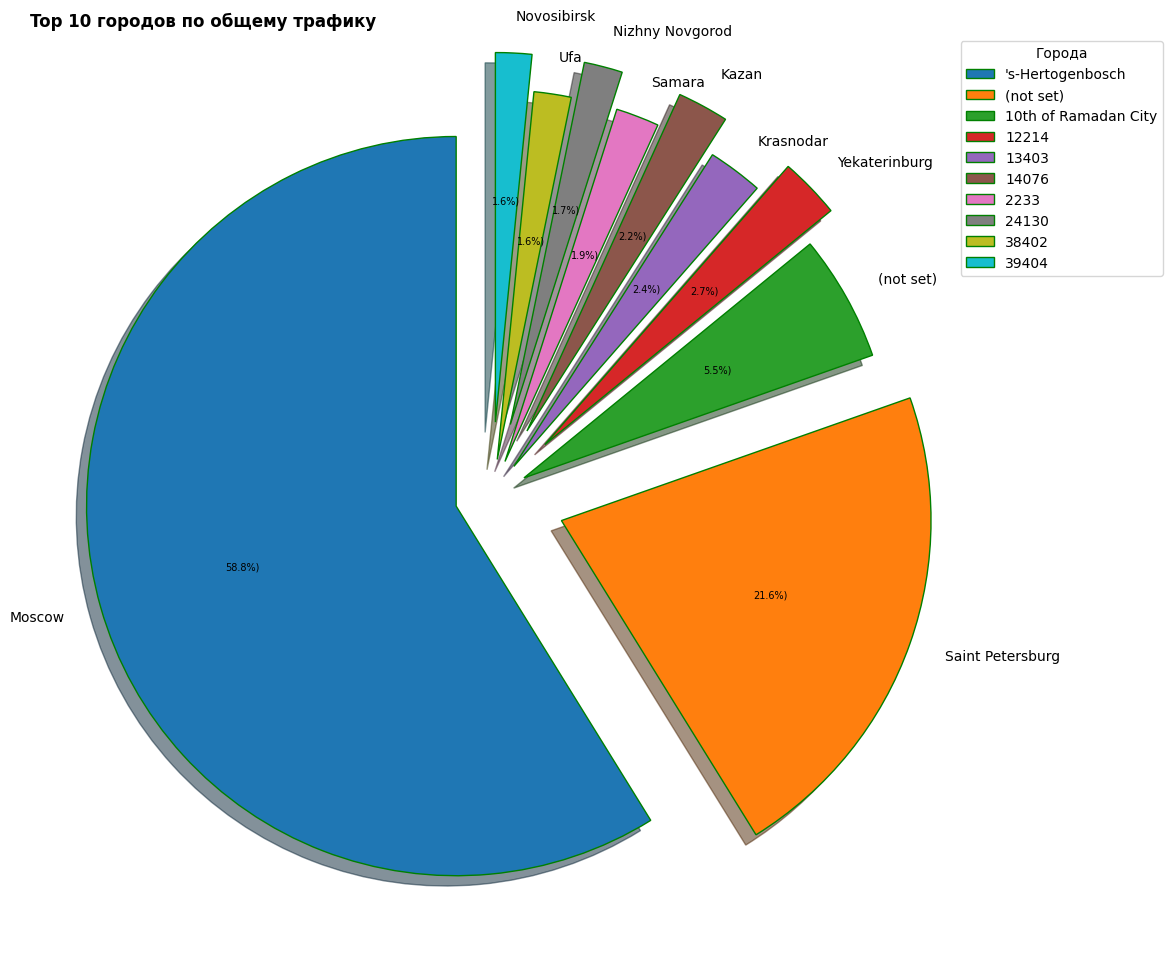

In [96]:
# отображаем общий объем трафика по топ 10 городов
top_total_city_graph = top_total_city.nlargest(n=10, columns=['target'])
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%)".format(pct, absolute)

explode = (0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2)

# Creating plot
fig, ax = plt.subplots(figsize =(14, 12))
wedges, texts, autotexts = ax.pie(top_total_city_graph.target,
                                  autopct = lambda pct: func(pct, top_total_city_graph.target),
                                  labels = top_total_city_graph.geo_city,
                                  shadow = True,
                                  explode = explode,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, top_total_city.geo_city,
          title ="Города",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 7)
ax.set_title("Top 10 городов по общему трафику", loc='left', weight = "bold")
 
# show plot
plt.show()

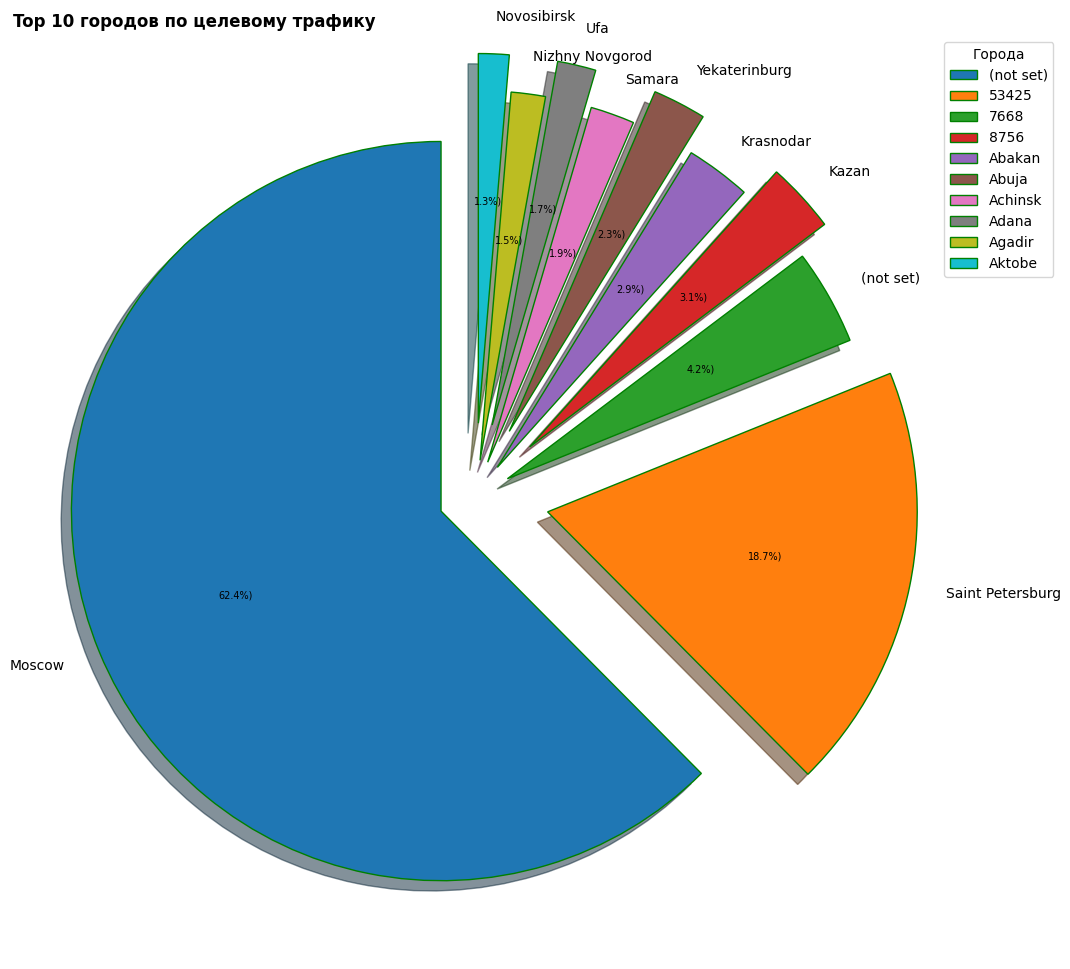

In [97]:
# отображаем целевой трафик по топ 10 городов
top_target_city_graph = top_target_city.nlargest(n=10, columns=['target'])
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%)".format(pct, absolute)

explode = (0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2)

# Creating plot
fig, ax = plt.subplots(figsize =(14, 12))
wedges, texts, autotexts = ax.pie(top_target_city_graph.target,
                                  autopct = lambda pct: func(pct, top_target_city_graph.target),
                                  
                                  labels = top_target_city_graph.geo_city,
                                  shadow = True,
                                  explode = explode,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, top_target_city.geo_city,
          title ="Города",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 7)
ax.set_title("Top 10 городов по целевому трафику", loc='left', weight = "bold")
 
# show plot
plt.show()

In [98]:
# Топ городов по CR
top_CR_city_graph = top_CR_city.nlargest(n=10, columns=['CR'])
fig = px.bar(top_CR_city_graph, x="geo_city", y="CR", color="geo_city",
             orientation="v", hover_name="geo_city",
             hover_data=['geo_city', 'CR'],
             labels={'geo_city': 'Город', 'CR': 'Conversion Rate'},
             title="Топ городов по CR",
             text_auto=True
             )
 
fig.show()

In [99]:
# Топ 10 городов по общему трафику с количеством посещений меньше 90 000
top_total_city_wo_top3_graph = top_total_city_wo_top3.nlargest(n=10, columns=['target'])
fig = px.bar(top_total_city_wo_top3_graph, x="geo_city", y="target", color="geo_city",
             orientation="v", hover_name="geo_city",
             hover_data=['geo_city', 'target'],
             labels={'geo_city': 'Город', 'target': 'объем общего трафика'},
             title="Топ 10 городов по общему трафику без городов присутствия и неопределенной локации",
             text_auto=True
             )
 
fig.show()

In [100]:
# Топ 10 городов по целевому трафику < 1 200
top_target_city_wo_top3_graph = top_target_city_wo_top3.nlargest(n=10, columns=['target'])
fig = px.bar(top_target_city_wo_top3_graph, x="geo_city", y="target", color="geo_city",
             orientation="v", hover_name="geo_city",
             hover_data=['geo_city', 'target'],
             labels={'geo_city': 'Город', 'target': 'объем целевого трафика'},
             title="Топ 10 городов по целевому трафику без городов присутствия и неопределенной локации",
             text_auto=True
             )
fig.show()

In [101]:
# Топ городов по CR без городов присутствия и неопределенной локации
top_CR_city_wo_3_graph = top_CR_city_wo_3.query('target_traf > 5')
top_CR_city_wo_3_graph = top_CR_city_wo_3_graph.nlargest(n=10, columns=['CR'])
fig = px.bar(top_CR_city_wo_3_graph, x="geo_city", y="CR", color="geo_city",
             orientation="v", hover_name="geo_city",
             hover_data=['geo_city', 'CR'],
             labels={'geo_city': 'Город', 'CR': 'Conversion rate'},
             title="Топ городов по CR без городов присутствия и неопределенной локации",
             text_auto=True
             )
 
fig.show()

In [102]:
# Города присутствия и неопределенная локация по общему трафику
fig = px.bar(top_total_city_90, x="geo_city", y="target", color="geo_city",
             orientation="v", hover_name="geo_city",
             hover_data=['geo_city', 'target'],
             labels={'geo_city': 'Город', 'target': 'объем общего трафика'},
             title="Города присутствия и неопределенная локация по общему трафику",
             text_auto=True
             )
 
fig.show()

In [103]:
# Города присутствия и неопределенная локация по целевому трафику 
fig = px.bar(top3_target_city, x="geo_city", y="target", color="geo_city",
             orientation="v", hover_name="geo_city",
             hover_data=['geo_city', 'target'],
             labels={'geo_city': 'Город', 'target': 'объем целевого трафика'},
             title="Города присутствия и неопределенная локация по целевому трафику",
             text_auto=True
             )
fig.show()

In [104]:
# Города присутствия и неопределенная локация по CR
fig = px.bar(top3_CR_city, x="geo_city", y="CR", color="geo_city",
             orientation="v", hover_name="geo_city",
             hover_data=['geo_city', 'CR'],
             labels={'geo_city': 'Город', 'CR': 'Conversion Rate'},
             title="Города присутствия и неопределенная локация по CR",
             text_auto=True
             )
 
fig.show()

#### из каких устройств к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)

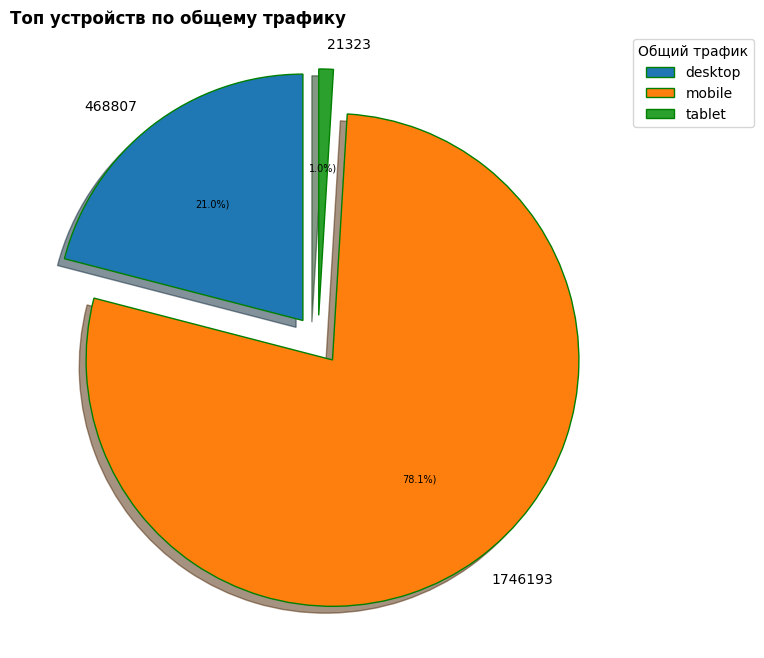

In [105]:
# Топ устройств по общему трафику
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%)".format(pct, absolute)

explode = (0.1, 0.1, 0.1)

# Creating plot
fig, ax = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = ax.pie(top_total_device.target,
                                  autopct = lambda pct: func(pct, top_total_device.target),
                                  
                                  labels = top_total_device.target,
                                  shadow = True,
                                  explode = explode,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, top_total_device.device_category,
          title ="Общий трафик",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 7)
ax.set_title("Топ устройств по общему трафику", loc='left', weight = "bold")
 
# show plot
plt.show()

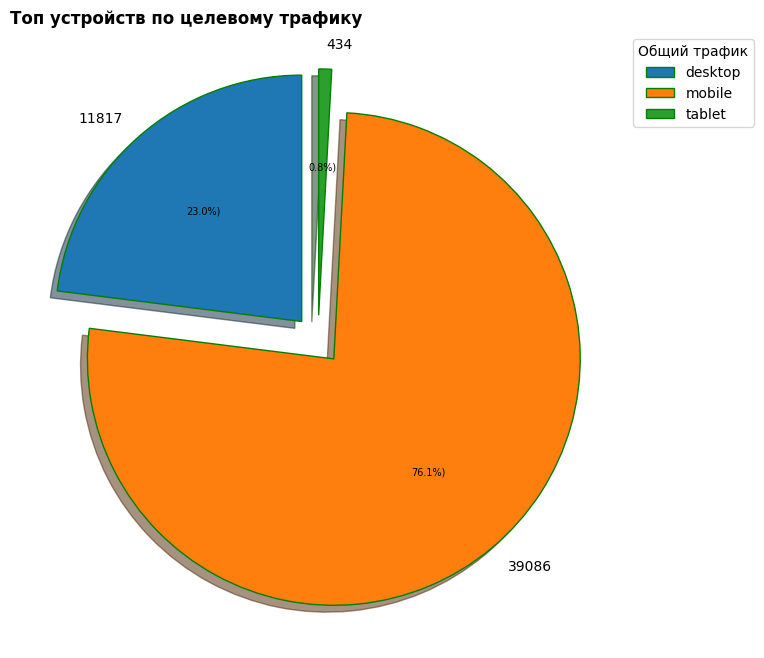

In [106]:
# Топ устройств по целевому трафику
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%)".format(pct, absolute)

explode = (0.1, 0.1, 0.1)

# Creating plot
fig, ax = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = ax.pie(top_target_device.target,
                                  autopct = lambda pct: func(pct, top_target_device.target),
                                  
                                  labels = top_target_device.target,
                                  shadow = True,
                                  explode = explode,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, top_target_device.device_category,
          title ="Общий трафик",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 7)
ax.set_title("Топ устройств по целевому трафику", loc='left', weight = "bold")
 
# show plot
plt.show()

In [107]:
# Топ устройств по Conversion Rate
fig = px.bar(top_CR_device, 
                        x="device_category",
                        y='CR', 
                        title="Conversion Rate по типам устройств", 
                        color='device_category', 
                        text_auto=True,
                        hover_data=['device_category', 'CR'],
                        labels={'device_category': 'тип устройства', 'CR': 'Conversion Rate'})

fig.show()


#### из каких кампаний к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)

In [108]:
# Топ 10 рекламных кампаний по общему трафику
top_total_campaign_b = top_total_campaign.nlargest(n=10, columns=['target'])
fig = px.bar(top_total_campaign_b, x="utm_campaign", y="target", color="target",
             orientation="v", hover_name="utm_campaign",
             hover_data=['utm_campaign', 'target'],
             labels={'utm_campaign': 'рекламная кампания', 'target': 'объем трафика'},
             title="Топ 10 рекламных кампаний по общему трафику",
             text_auto=True
             )
 
fig.show()

In [109]:
# Топ 10 рекламных кампаний по целевому трафику
top_target_campaign_b = top_target_campaign.nlargest(n=10, columns=['target'])
fig = px.bar(top_target_campaign_b, x="utm_campaign", y="target", color="target",
             orientation="v", hover_name="utm_campaign",
             hover_data=['utm_campaign', 'target'],
             labels={'utm_campaign': 'рекламная кампания', 'target': 'объем трафика'},
             title="Топ 10 рекламных кампаний по целевому трафику",
             text_auto=True
             )
 
fig.show()

In [110]:
# Топ рекламных кампаний по Conversion Rate при условии что значения общего и целевого трафика > 5
top_CR_campaign_b = top_CR_campaign.nlargest(n=25, columns=['CR'])
top_CR_campaign_b = top_CR_campaign_b.query('total_traf > 5 & target_traf > 5')
# top_CR_campaign_b = top_CR_campaign.nlargest(n=10, columns=['CR'])
fig = px.bar(top_CR_campaign_b, x="utm_campaign", y="CR", color="CR",
             orientation="v", hover_name="utm_campaign",
             hover_data=['utm_campaign', 'CR'],
             labels={'utm_campaign': 'рекламная кампания', 'CR': 'объем трафика'},
             title="Топ рекламных кампаний по Conversion Rate",
             text_auto=True
             )
 
fig.show()

In [111]:
# Топ рекламных кампаний по Conversion Rate в сравнении с общим и целевым трафиком, при условии что их значения > 5
top_CR_campaign_a = top_CR_campaign.nlargest(n=25, columns=['CR'])
top_CR_campaign_a = top_CR_campaign_a.query('total_traf > 5 & target_traf > 5')
x = top_CR_campaign_a.utm_campaign
y1 = top_CR_campaign_a.total_traf
y2 = top_CR_campaign_a.target_traf
y3 = top_CR_campaign_a.CR
fig = go.Figure()
fig.add_bar(x=x,y=y1, text=top_CR_campaign_a.total_traf, texttemplate = "%{value:,.0f}", textposition='outside', showlegend=True)
fig.add_bar(x=x,y=y2, text=top_CR_campaign_a.target_traf, texttemplate = "%{value:,.0f}", textposition='outside', showlegend=True)
fig.add_bar(x=x,y=y3, text=top_CR_campaign_a.CR, texttemplate = "%{value:,.2f}", textposition='inside', showlegend=True)
fig.update_layout(barmode="group")
fig.show()

### Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель Conversion Rate в целевые события

In [112]:
# Топ 10 авто по общему трафику за исключением неопределенных марок 

top_total_auto_10 = top_total_auto.nlargest(n=10, columns=['target'])
top_total_auto_10.query('auto != "nd nd"', inplace=True)
fig = px.bar(top_total_auto_10, x="auto", y="target", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'target'],
             labels={'auto': 'Авто', 'target': 'Объем общего трафика'},
             title="Топ 10 авто по общему трафику",
             text_auto=True
             )
 
fig.show()

In [113]:
# Топ 10 авто по целевому трафику

top_target_auto_10 = top_target_auto.nlargest(n=10, columns=['target'])
top_target_auto_10.query('auto != "nd nd"', inplace=True)
fig = px.bar(top_target_auto_10, x="auto", y="target", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'target'],
             labels={'auto': 'Авто', 'target': 'Объем целевого трафика'},
             title="Топ 10 авто по целевому трафику",
             text_auto=True
             )
 
fig.show()

In [114]:
# # Топ 10 авто по Conversion Rate
top_CR_auto_g = top_CR_auto.query('target_traf > 5')
top_CR_auto_g = top_CR_auto_g.nlargest(n=10, columns=['CR'])
fig = px.bar(top_CR_auto_g, x="auto", y="CR", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'CR'],
             labels={'auto': 'Авто', 'CR': 'Conversion Rate'},
             title="Топ 10 авто по Conversion Rate",
             text_auto=True
             )
 
fig.show()

In [116]:
# Топ 10 авто по Conversion Rate при общем трафике > 5000 в сравнении с общим и целевым трафиком
top_CR_auto_graph = top_CR_auto.query('target_traf > 5')
top_CR_auto_graph.sort_values('CR', ascending=False, inplace=True)
top_CR_auto_graph = top_CR_auto_graph.nlargest(n=10, columns=['CR'])
x = top_CR_auto_graph.auto
y1 = top_CR_auto_graph.total_traf
y2 = top_CR_auto_graph.target_traf
y3 = top_CR_auto_graph.CR
fig = go.Figure()
fig.add_bar(x=x,y=y3, text=top_CR_auto_graph.CR, texttemplate = "%{value:,.2f}", textposition='outside', name='CR')
fig.add_bar(x=x,y=y1, text=top_CR_auto_graph.total_traf, texttemplate = "%{value:,.0f}", textposition='outside', name='Общий трафик')
fig.add_bar(x=x,y=y2, text=top_CR_auto_graph.target_traf, texttemplate = "%{value:,.0f}", textposition='outside', name='Целевой трафик')

fig.update_layout(barmode="group",
        title="Топ 10 авто по Conversion Rate при общем трафике > 5000 в сравнении с общим и целевым трафиком",
        yaxis_title="Conversion Rate")
fig.show()

# fig = go.Figure(data=[
#     go.Bar(name='Social=True', x=x, y=y3, text = y3),
#     go.Bar(name='Social=False', x=x, y=y4, text = y4)
# ])

In [117]:
# Топ 10 авто по общему трафику за исключением неопределенных марок и общем трафике > 5000

top_total_auto_m5 = top_CR_auto_m5.nlargest(n=10, columns=['total_traf'])
fig = px.bar(top_total_auto_m5, x="auto", y="total_traf", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'total_traf'],
             labels={'auto': 'Авто', 'total_traf': 'Объем общего трафика'},
             title="Топ 10 авто по общему трафику за исключением неопределенных марок и общем трафике > 5000",
             text_auto=True
             )
 
fig.show()

In [118]:
# Топ 10 авто по общему трафику за исключением неопределенных марок и общем трафике <= 5000
top_total_auto_l5 = top_CR_auto_l5.nlargest(n=10, columns=['total_traf'])
fig = px.bar(top_total_auto_l5, x="auto", y="total_traf", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'total_traf'],
             labels={'auto': 'Авто', 'total_traf': 'Объем общего трафика'},
             title="Топ 10 авто по общему трафику за исключением неопределенных марок и общем трафике <= 5000",
             text_auto=True
             )
 
fig.show()

In [119]:
# Топ 10 авто по целевому трафику за исключением неопределенных марок и общем трафике <= 5000
top_target_auto_l5 = top_CR_auto_l5.nlargest(n=10, columns=['target_traf'])
fig = px.bar(top_target_auto_l5, x="auto", y="target_traf", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'target_traf'],
             labels={'auto': 'Авто', 'target_traf': 'Объем целевого трафика'},
             title="Топ 10 авто по целевому трафику за исключением неопределенных марок и общем трафике <= 5000",
             text_auto=True
             )
 
fig.show()

In [120]:
# Топ 10 авто по целевому трафику за исключением неопределенных марок и общем трафике > 5000
top_target_auto_m5 = top_CR_auto_m5.nlargest(n=10, columns=['target_traf'])
fig = px.bar(top_target_auto_m5, x="auto", y="target_traf", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'target_traf'],
             labels={'auto': 'Авто', 'target_traf': 'Объем целевого трафика'},
             title="Топ 10 авто по целевому трафику за исключением неопределенных марок и общем трафике > 5000",
             text_auto=True
             )
 
fig.show()

In [121]:
# Топ 10 авто по CR за исключением неопределенных марок и общем трафике > 5000
top_CR_auto_m5_graph = top_CR_auto_m5.nlargest(n=10, columns=['CR'])
fig = px.bar(top_CR_auto_m5_graph, x="auto", y="CR", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'CR'],
             labels={'auto': 'Авто', 'CR': 'Conversion Rate'},
             title="Топ 10 авто по CR за исключением неопределенных марок и общем трафике > 5000",
             text_auto=True
             )
 
fig.show()

In [122]:
# Топ 10 авто по CR за исключением неопределенных марок и общем трафике > 5000
top_CR_auto_l5_graph = top_CR_auto_l5.nlargest(n=10, columns=['CR'])
fig = px.bar(top_CR_auto_l5_graph, x="auto", y="CR", color="auto",
             orientation="v", hover_name="auto",
             hover_data=['auto', 'CR'],
             labels={'auto': 'Авто', 'CR': 'Conversion Rate'},
             title="Топ 10 авто по CR за исключением неопределенных марок и общем трафике <= 5000",
             text_auto=True
             )
 
fig.show()

### Стоит ли увеличивать своё присутствие в соц сетях и размещать там больше рекламы?

In [123]:
# CR по месяцам с рекламой в соц сетях и без неё
social_CR_graph = social_CR.copy()
not_social_CR_graph = not_social_CR.copy()
x = social_CR_graph.month
y3 = social_CR_graph.CR
y4 = not_social_CR_graph.CR
fig = go.Figure(data=[
    go.Bar(name='Social=True', x=x, y=y3, text = y3),
    go.Bar(name='Social=False', x=x, y=y4, text = y4)
])
fig.update_layout(barmode="group",
        title="CR по месяцам с рекламой в соц сетях и без неё",
        yaxis_title="Conversion Rate"
)
fig.show()

In [124]:
# Общий трафик по месяцам с рекламой в соц сетях и без неё
social_CR_graph = social_CR.copy()
not_social_CR_graph = not_social_CR.copy()
x = social_CR_graph.month
y1 = social_CR_graph.total_social_traf
y2 = not_social_CR_graph.total_not_social_traf
fig = go.Figure(data=[
    go.Bar(name='Social=True', x=x, y=y1, text=y1),
    go.Bar(name='Social=False', x=x, y=y2, text=y2)
])
fig.update_layout(barmode="group",
        title="Общий трафик по месяцам с рекламой в соц сетях и без неё",
        yaxis_title="Conversion Rate"
)
fig.show()